# **Análise exploratória do Dataset "Black friday sales**"
Disponível em: https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale

Grupo 1: Alessa, Beatriz, Guilherme, João, Thais e Thiago

In [ ]:
#código para importar um arquivo do computador
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1. Apresentação do Dataset**

 **Descrição dos dados:**

* Variable - Definição
* User_ID - User ID
* Product_ID - Product ID
* Gender - Sexo do usuário
* Age - Idade
* Occupation - Ocupação (Masked)
* City_Category - Categoria da cidades (A, B, C)
* Stay_In_Current_City_Years - Anos de permanência na cidade atual
* Marital_Status - Estado civil
* Product_Category_1 - Categoria do produto (Masked)
* Product_Category_2 - O produto pode pertencer a outras categorias também (Masked)
* Product_Category_3 - O produto pode pertencer a outras categorias também (Masked)
* Purchase - Valor da compra (Variável) 



In [ ]:
#definição do dataframe:
df = pd.read_csv("train.csv")
df.head()

NameError: ignored

In [ ]:
#Dimensões:
df.shape

In [ ]:
#As informações armazenadas são divididas nas seguintes categorias:
df.columns

In [ ]:
df.info()

In [ ]:
# observação dos valores nulos por coluna
df.isnull().sum()

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values()

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True).plot(kind = 'barh',
                                                                   title = 'Valores nulos por coluna',
                                                                   ylabel = '')

**Observando os dados:**

In [ ]:
#Gêneros presentes no dataset:
df["Gender"].unique()

In [ ]:
df['Age'].unique()

In [ ]:
df['Occupation'].unique()

In [ ]:
df['City_Category'].unique()

In [ ]:
df['Stay_In_Current_City_Years'].unique()

In [ ]:
df['Marital_Status'].unique()

In [ ]:
Ticket_med = round((df["Purchase"].sum()/df.shape[0]),2)
Ticket_med

# **2. Processamento dos dados**

In [ ]:
# As únicas colunas que apresentam valores nulos são "Product_Category_2" e "Product_Category_3" 
# Essas colunas possuem valores mascarados, além de já possuir uma coluna "Product_Category_1" sem valores nulos 
# Foi decidido remover-las por não serem necessárias para as análises

In [ ]:
df = df.drop(["Product_Category_2","Product_Category_3"], axis= 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


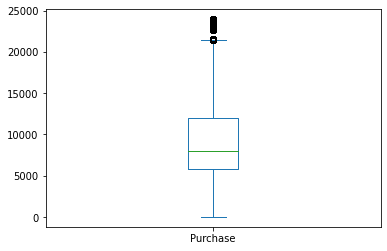

In [ ]:
# Vamos analisar como os outliers se comportam
df.Purchase.plot(kind = "box")

In [ ]:
# O dataset apresenta outliers apenas na parte superior
# Vamos utilizar o modelo de cálculo com base nos quartils

In [ ]:
q1 = df.Purchase.quantile(0.25)
q3 = df.Purchase.quantile(0.75)
iqr = q3-q1
out_sup = q3+1.5*iqr
out_sup

21400.5

In [ ]:
# Valores a partir de 21400.5 são considerados outliers

In [ ]:
outliers = df[df['Purchase'] > out_sup]
outliers.shape

(2677, 10)

In [ ]:
outliers.Purchase.describe()

count     2677.000000
mean     23238.392230
std        701.671127
min      21401.000000
25%      23154.000000
50%      23418.000000
75%      23684.000000
max      23961.000000
Name: Purchase, dtype: float64

In [ ]:
# Temos 2677 valores como outliers

In [ ]:
outliers_porcentagem = (outliers.Purchase.count()/df.Purchase.count())*100
outliers_porcentagem

0.4866671029763593

In [ ]:
# Os outliers representam menos de 0.5% do dataset

In [ ]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
not_outliers = outliers = df[df['Purchase'] < out_sup]
not_outliers.Purchase.describe()

count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64

In [ ]:
# A média e o desvio padrão do dataset não possui diferenças tão grandes comparadas aos valores filtrados sem os outliers

In [ ]:
outliers.Purchase.min() - not_outliers.Purchase.max()

-21387

In [ ]:
outliers.Purchase.max() - not_outliers.Purchase.max()

0

In [ ]:
# os valores máximo e mínimo dos ouliers não apresentam valores tão discrepantes do valor máximo dos valores considerados não outliers

In [ ]:
# A partir dessas informações, foi decidido que os outliers não possuem grande influência na apuração dos dados, por isso, eles não serão retirados da análise.

# **3. Análise Exploratória**

In [ ]:
# Categorias dos produtos
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

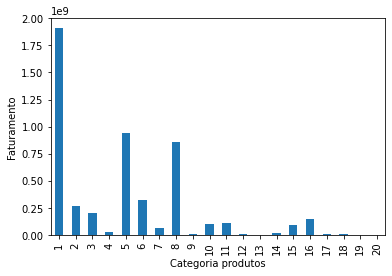

In [ ]:
# Faturamento por categoria de produtos
#df.rename(columns = {'Product_Category_1': 'Categoria produtos', 'Purchase': 'Faturamento'}, inplace = True)
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar',  
                                                        xlabel= 'Categoria produtos',
                                                        ylabel= 'Faturamento'

)

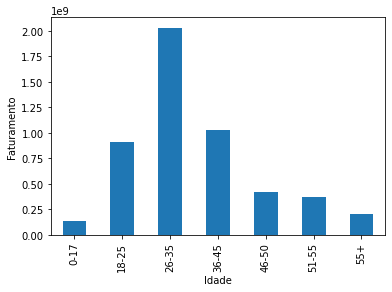

In [ ]:
# Faturamento por idade
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',
                                         xlabel= 'Idade',
                                         ylabel= 'Faturamento'
                                         )

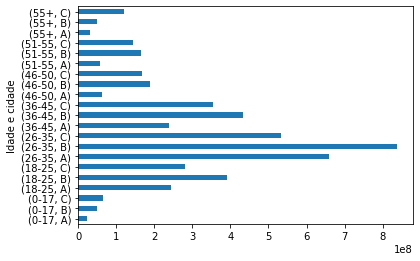

In [ ]:
# Faturamento por idade e cidade
df.groupby(['Age', 'City_Category'])['Purchase'].sum().plot(kind = 'barh',
                                                            xlabel='Idade e cidade',
                                                            ylabel='Faturamento'
                                                            )

**Solteiros compram mais?**

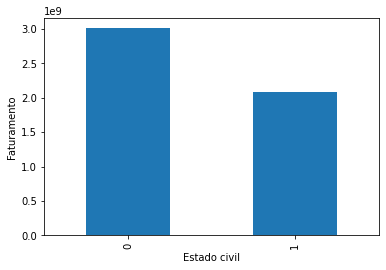

In [ ]:
# Faturamento por estado civil 
df.groupby('Marital_Status')['Purchase'].sum().plot(kind = 'bar',
                                                    xlabel='Estado civil',
                                                    ylabel='Faturamento')

In [ ]:
# Faturamento por estado civil e genero
df.groupby(['Marital_Status', 'Gender'])['Purchase'].sum()

Marital_Status  Gender
0               F          684154127
                M         2324773320
1               F          502078515
                M         1584806780
Name: Purchase, dtype: int64

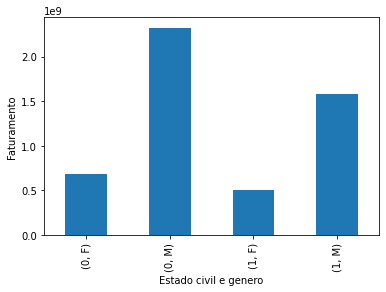

In [ ]:
df.groupby(['Marital_Status', 'Gender'])['Purchase'].sum().plot(kind = 'bar',
                                                    xlabel='Estado civil e genero',
                                                    ylabel='Faturamento')

**Análise dos produtos (product_id)**

In [ ]:
import matplotlib.pyplot as plt

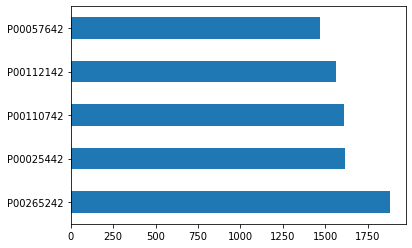

In [ ]:
grafico_legendado = produtos_mais_vendidos.sort_values(ascending=False).head().plot(kind = 'barh')

In [ ]:
grafico_legendado.containers[0].datavalues

AttributeError: ignored

In [ ]:
labels = [str(round(x / grafico_lengendado.containers[0].datavalues.sum() * 100, 1)) + '%' for x in grafico_legendado.containers[0].datavalues]

AttributeError: ignored

AttributeError: ignored

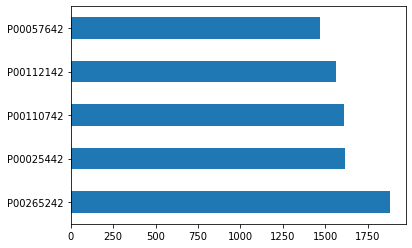

In [ ]:
# produtos mais vendidos
produtos_mais_vendidos = df.Product_ID.value_counts()
grafico_legendado = produtos_mais_vendidos.sort_values(ascending=False).head().plot(kind = 'barh')
plt.bar_label(grafico_legendado.containers[0], labels);
grafico_legendado.spines['top'].set_visible(False)
grafico_legendado.spines['right'].set_visible(False)

In [ ]:
labels

NameError: ignored

In [ ]:
# produtos mais vendidos
produtos_mais_vendidos = df.Product_ID.value_counts()
grafico_lengendado = produtos_mais_vendidos.sort_values(ascending=False).head().plot(kind = 'barh')
plt.bar_label(grafico_lengendado.containers[0], labels);
grafico_lengendado.spines['top'].set_visible(False)
grafico_lengendado.spines['right'].set_visible(False)

In [ ]:
produtos_5mais = produtos_mais_vendidos.head()

In [ ]:
produtos_mais_vendidos

In [ ]:
# Faturamento por produto e por genero
df.groupby(['Gender', 'Product_ID'])['Purchase'].sum().head().plot(kind = 'barh',
                                                    xlabel='Faturamento',
                                                    ylabel='Genero e produto')

In [ ]:
# Faturamento do genero masculino por produto
df[df['Gender'] == 'M'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head().plot(kind = 'bar',
                                                                                                         xlabel='Produto',
                                                                                                         ylabel='Faturamento')

In [ ]:
# Faturamento do genero feminino por produto
df[df['Gender'] == 'F'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head().plot(kind = 'bar',
                                                                                                         xlabel='Produto',
                                                                                                         ylabel='Faturamento')

# **4. Conclusões**



*   Item da lista
*   Item da lista

